# Data Pre-Processing

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"EasyVisa.csv")
# Print shape of dataset
print(df.shape)

(25480, 12)


## Data Cleaning

1. **Handling Missing Values**:
   - Identify and handle any missing values in the dataset to ensure data completeness. Techniques may include:
     - **Imputation**: Replace missing values using methods such as mean, median, or mode.
     - **Dropping Rows/Columns**: If a column has too many missing values or is not significant, it may be dropped.

2. **Handling Duplicates**:
   - Check for duplicate rows in the dataset and remove them to avoid data redundancy, which can lead to inaccurate model performance.

3. **Check Data Types**:
   - Ensure each feature is of the correct data type. Convert columns if necessary, for example:
     - **Numerical**: Ensure wage, employee counts, and other numerical columns are in numerical format.
     - **Categorical**: Convert features like continent, visa status, and job training requirements to categorical types if not already done.

4. **Understand the Dataset**:
   - Perform a high-level overview of the dataset:
     - Use methods like `.info()`, `.describe()`, and `.head()` to understand the data structure, summary statistics, and first few rows.
     - Gain insights into the dataset, such as feature distributions, categorical levels, and numerical ranges.

These data cleaning steps will ensure the dataset is well-prepared, consistent, and ready for further analysis and modeling.

### Handling Missing Values

In [36]:
import numpy as np

# Identify features with missing values and print their percentages
features_with_na = df.columns[df.isnull().any()].tolist()

# Display features and percentage of missing values
for feature in features_with_na:
    missing_pct = df[feature].isnull().mean() * 100
    print(f"{feature}: {missing_pct:.2f}% missing values")
features_with_na


[]

### Handling Duplicates

In [37]:
df.duplicated().sum()

0

### Remove case_id from the dataset as it cannot used in Model Training

In [38]:
# Drop case_id column
df.drop(columns='case_id', inplace=True)

## Feature Engineering

In [39]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [40]:
from datetime import date

# Calculate company's age and drop 'yr_of_estab' column
df['company_age'] = date.today().year - df['yr_of_estab']
df.drop(columns='yr_of_estab', inplace=True)
df.head()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


In [41]:
df.shape

(25480, 11)

In [42]:
# Classify features based on data type and uniqueness
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
discrete_features = [feature for feature in num_features if df[feature].nunique() <= 25]
continuous_features = [feature for feature in num_features if feature not in discrete_features]

# Print feature counts
print(f'Num of Numerical Features: {len(num_features)}')
print(f'Num of Categorical Features: {len(cat_features)}')
print(f'Num of Discrete Features: {len(discrete_features)}')
print(f'Num of Continuous Features: {len(continuous_features)}')

Num of Numerical Features: 3
Num of Categorical Features: 8
Num of Discrete Features: 0
Num of Continuous Features: 3


## Spliting Data
* Split Dataframe to X and y
* Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.

In [43]:
X = df.drop('case_status', axis=1)
y = df['case_status']

In [44]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

## Feature Transformation

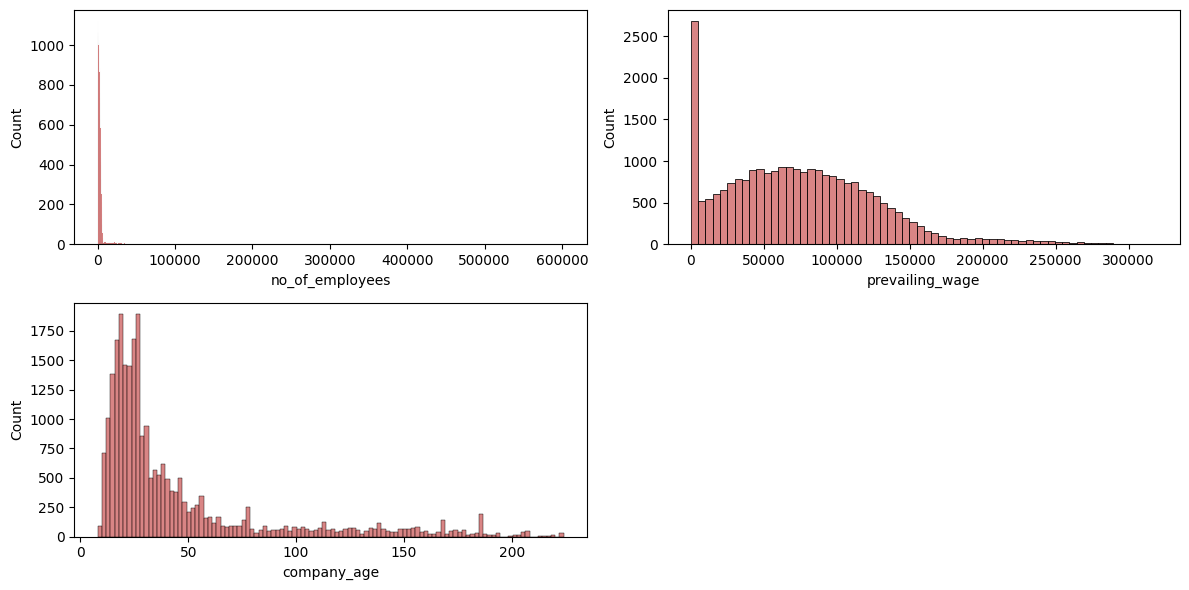

In [45]:
# If the target column has Denied it is encoded as 1 others as 0
y= np.where(y=='Denied', 1,0)
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* No of employees and Copmany age column is skewed
* Apply a power transform featurewise to make data more Gaussian-like.
Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [46]:
# Check skewness for continuous features
skewness = X[continuous_features].skew(axis=0, skipna=True).round(2)
print(skewness)


no_of_employees    12.27
prevailing_wage     0.76
company_age         2.04
dtype: float64


## Apply Power Transformer to Check if it can reduces the outliers

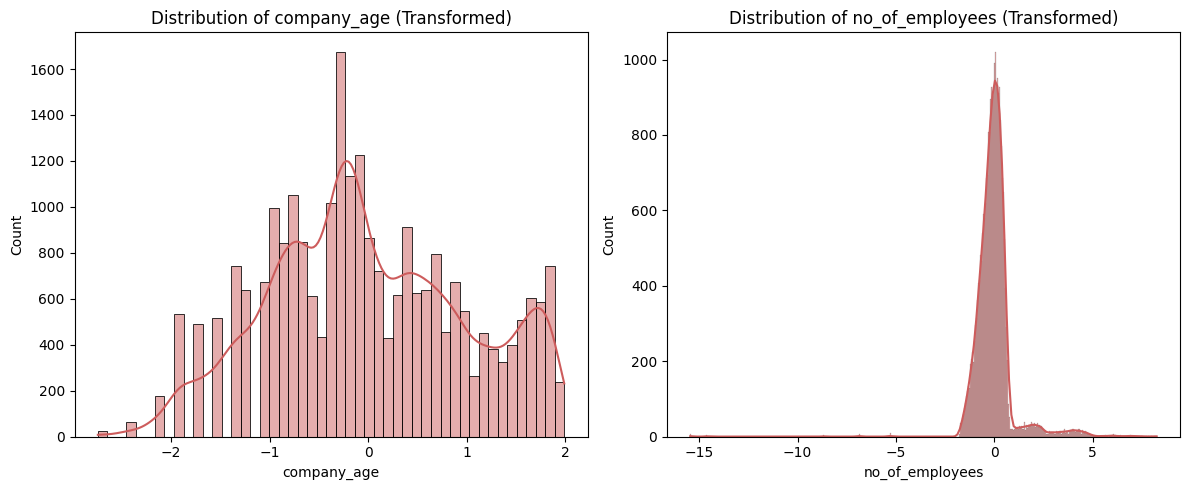

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Define the features to transform
transform_features = ['company_age', 'no_of_employees']

# Apply Yeo-Johnson power transformation to specified features and create a DataFrame for visualization
pt = PowerTransformer(method='yeo-johnson')
X_copy = pd.DataFrame(pt.fit_transform(X[transform_features]), columns=transform_features)

# Plot histograms for the transformed features
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(X_copy[col], color='indianred', kde=True)
    plt.xlabel(col)
    plt.title(f'Distribution of {col} (Transformed)')
    plt.tight_layout()

# Show the plot
plt.show()


In [48]:
X_copy.shape

(25480, 2)

**Checking Scewness**

In [49]:
X_copy.skew(axis=0, skipna=True)

company_age        0.103264
no_of_employees    0.399339
dtype: float64

## Feature Encoding and Scaling

1. **One-Hot Encoding**: 
   - Applied to categorical features with **fewer unique values** and **non-ordinal** relationships to convert them into binary form. This helps ML algorithms make better predictions.

2. **Ordinal Encoding**: 
   - Used for **ordinal variables** with ranked categories or many unique values. This encoding is compatible with column transformers and helps retain the rank order among discrete values.

3. **Standard Scaler**: 
   - **Standardizes features** by removing the mean and scaling to unit variance, making the features suitable for many ML models that assume normally distributed data.

4. **Power Transformer**:
   - Applied to **numerical features** to make their distributions more **Gaussian-like**, improving performance for algorithms sensitive to skewness or heteroscedasticity.

In [50]:
num_features = list(X.select_dtypes(exclude="object").columns)
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define columns for transformations
or_columns = ['has_job_experience', 'requires_job_training', 'full_time_position', 'education_of_employee']
oh_columns = ['continent', 'unit_of_wage', 'region_of_employment']
transform_columns = ['no_of_employees', 'company_age']

# Create Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), oh_columns),
        ("ordinal", OrdinalEncoder(), or_columns),
        ("power_transform", PowerTransformer(method='yeo-johnson'), transform_columns),
        ("scaler", StandardScaler(), transform_columns)
    ],
    remainder='passthrough'  # To keep any columns not specified
)



In [52]:
X = preprocessor.fit_transform(X)
X

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         3.86666575e-01, -6.51229925e-01,  5.92202900e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.42281546e-01, -5.33211031e-01,  8.34256500e+04],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.69498375e+00, -6.74833704e-01,  1.22996860e+05],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.98712587e-01,  1.63833662e+00,  1.46298850e+05],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.63874834e-01,  2.18122353e+00,  8.61547700e+04],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.08055748e-01,  4.58147679e-01,  7.08769100e+04]])

In [53]:
X.shape

(25480, 24)

# Classification

In [54]:
from imblearn.combine import SMOTEENN

# Apply SMOTEENN to handle class imbalance
smt = SMOTEENN(random_state=42, sampling_strategy='minority')
X_res, y_res = smt.fit_resample(X, y)
X_res.shape,y_res.shape

((9640, 24), (9640,))

### Handling Imbalanced Data with SMOTEENN

The code above uses **SMOTEENN** from the `imblearn` library to handle class imbalance in the dataset:

- **SMOTEENN** is a combination of **SMOTE** (Synthetic Minority Over-sampling Technique) and **ENN** (Edited Nearest Neighbors).
- **SMOTE** generates synthetic samples for the **minority class**, helping to balance the dataset.
- **ENN** removes noisy and overlapping examples from the **majority class**.
- This combination balances the dataset by both **over-sampling** the minority class and **cleaning** the majority class, leading to a better representation for training machine learning models.

This approach improves model performance on imbalanced datasets by addressing issues of bias towards the majority class.

## Train Test Split

In [55]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7712, 24), (1928, 24))

In [56]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [57]:
# Define function to evaluate metrics
def evaluate_clf(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_pred)
    }

In [58]:
# Define models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [59]:
# Function to evaluate models and return report
def evaluate_models(X, y, models):
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Lists to store results
    results = []

    # Iterate over each model
    for model_name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions on test set
        y_test_pred = model.predict(X_test)
        
        # Evaluate model
        metrics = evaluate_clf(y_test, y_test_pred)
        
        # Store results
        results.append({
            "Model Name": model_name,
            **metrics
        })

    # Convert results to a DataFrame and sort by Accuracy
    report = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
    
    return report

# Example usage:
report = evaluate_models(X, y, models)

In [60]:
report

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC
2,Gradient Boosting,0.759027,0.584855,0.684877,0.510324,0.696650
6,CatBoosting Classifier,0.752355,0.575084,0.669804,0.503835,0.690024
8,AdaBoost Classifier,0.740385,0.516977,0.678161,0.417699,0.659452
5,XGBClassifier,0.737834,0.556146,0.636502,0.493805,0.676629
0,Random Forest,0.731947,0.543144,0.627027,0.479056,0.668519
3,Logistic Regression,0.695055,0.287156,0.645361,0.184661,0.567044
1,Decision Tree,0.668171,0.498071,0.501195,0.494985,0.624735
7,Support Vector Classifier,0.667386,0.000000,0.000000,0.000000,0.500000
4,K-Neighbors Classifier,0.628925,0.341344,0.416667,0.289086,0.543690


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for various models, including Gradient Boosting
xgboost_params = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9]
}

gradient_boosting_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5, 6],
    "subsample": [0.6, 0.8, 1.0]
}

# List of models for hyperparameter tuning, now includes Gradient Boosting
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("Random Forest", RandomForestClassifier(), rf_params),
    ("K-Neighbors Classifier", KNeighborsClassifier(), knn_params),
    ("Gradient Boosting", GradientBoostingClassifier(), gradient_boosting_params)
]

# Function for hyperparameter tuning and reporting results
def hyperparameter_tuning(models, X, y):
    best_params = {}
    
    for name, model, params in models:
        print(f"Tuning hyperparameters for: {name}")
        
        # Randomized Search for hyperparameter tuning
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=params,
            n_iter=20,  # Reduced for efficiency, can be increased as needed
            cv=3,
            verbose=2,
            n_jobs=-1,
            random_state=42
        )
        
        # Fit the model
        random_search.fit(X, y)
        
        # Save the best parameters for each model
        best_params[name] = random_search.best_params_
        
        print(f"Best Parameters for {name}: {random_search.best_params_}\n")

    return best_params

# Run hyperparameter tuning
best_model_params = hyperparameter_tuning(randomcv_models, X_res, y_res)


Tuning hyperparameters for: XGBoost
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for XGBoost: {'min_child_weight': 5, 'max_depth': 5}

Tuning hyperparameters for: Random Forest
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Random Forest: {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 10}

Tuning hyperparameters for: K-Neighbors Classifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for K-Neighbors Classifier: {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'brute'}

Tuning hyperparameters for: Gradient Boosting
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2}



In [62]:
best_model_params

{'XGBoost': {'min_child_weight': 5, 'max_depth': 5},
 'Random Forest': {'n_estimators': 50,
  'max_features': 'log2',
  'max_depth': 10},
 'K-Neighbors Classifier': {'weights': 'distance',
  'n_neighbors': 3,
  'algorithm': 'brute'},
 'Gradient Boosting': {'subsample': 0.8,
  'n_estimators': 200,
  'max_depth': 5,
  'learning_rate': 0.2}}

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

# Retrain models with the best parameters, now including Gradient Boosting
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**best_model_params['Random Forest']),
    "KNeighborsClassifier": KNeighborsClassifier(**best_model_params['K-Neighbors Classifier']),
    "XGBClassifier": XGBClassifier(**best_model_params['XGBoost'], n_jobs=-1),
    "Gradient Boosting Classifier": GradientBoostingClassifier(**best_model_params['Gradient Boosting'])
}

# Evaluate the tuned models and get the report
tuned_report = evaluate_models(X=X_res, y=y_res, models=best_models)

# Display the report
tuned_report


,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC
1,KNeighborsClassifier,0.969917,0.973850,0.966876,0.980926,0.968093
3,Gradient Boosting Classifier,0.879668,0.890875,0.923902,0.860127,0.882905
0,Random Forest Classifier,0.865664,0.874819,0.934917,0.821980,0.872901
2,XGBClassifier,0.862552,0.875059,0.909804,0.842870,0.865812


In [64]:
from sklearn.metrics import accuracy_score, classification_report

# Retrain the K-Neighbors Classifier with the best parameters
best_knn_model = KNeighborsClassifier(**best_model_params['K-Neighbors Classifier'])
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
classification_rpt = classification_report(y_test, y_pred)

# Print final model results
print("FINAL MODEL: K-Neighbors Classifier")
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rpt)


FINAL MODEL: K-Neighbors Classifier
Accuracy Score: 0.9699

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       827
           1       0.97      0.98      0.97      1101

    accuracy                           0.97      1928
   macro avg       0.97      0.97      0.97      1928
weighted avg       0.97      0.97      0.97      1928



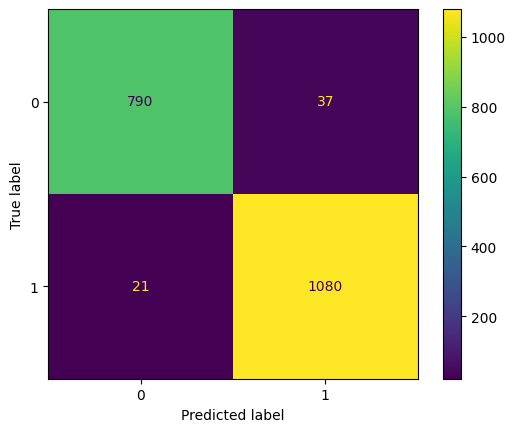

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix for the best K-Neighbors Classifier model
ConfusionMatrixDisplay.from_estimator(best_knn_model, X_test, y_test)


# **Best Model is K-Neighbors Classifier**